In [1]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd
import scorecardpy as sc
import numpy as np
from scipy.stats import beta
import math
import random

In [2]:
with open('australian.dat','r') as f:
    df = pd.DataFrame(l.rstrip().split() for l in f)
    
df = df.rename(columns={0: '0', 1: '1',2: '2',3: '3',4: '4',5: '5',6: '6',7: '7',8: '8',9: '9',10: '10',11: '11',12: '12',13: '13'})
df = df.astype(float)
        
df["index"] = range(1, len(df) + 1)
df = df.set_index("index")
df['Class']=df[14]
df=df.drop([14],axis=1)
df['Amount']=1000

df['Class']=df['Class'].replace(1, 2)
df['Class']=df['Class'].replace(0, 1)
df['Class']=df['Class'].replace(2, 0)

In [3]:
train, test = sc.split_df(df, y = 'Class',ratio = 0.7, seed = 32491565).values()
train["index"] = range(1, len(train) + 1)
train = train.set_index("index")
test["index"] = range(1, len(test) + 1)
test = test.set_index("index")

In [4]:
y=pd.DataFrame(train['Class'])
train.drop('Class',axis=1,inplace=True)
X = train
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(max_depth=2)
model = clf.fit(X, y)

In [5]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_2 <= 0.17
|   |   |--- class: 1.0
|   |--- feature_2 >  0.17
|   |   |--- class: 1.0
|--- feature_7 >  0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 0.0
|   |--- feature_9 >  0.50
|   |   |--- class: 0.0



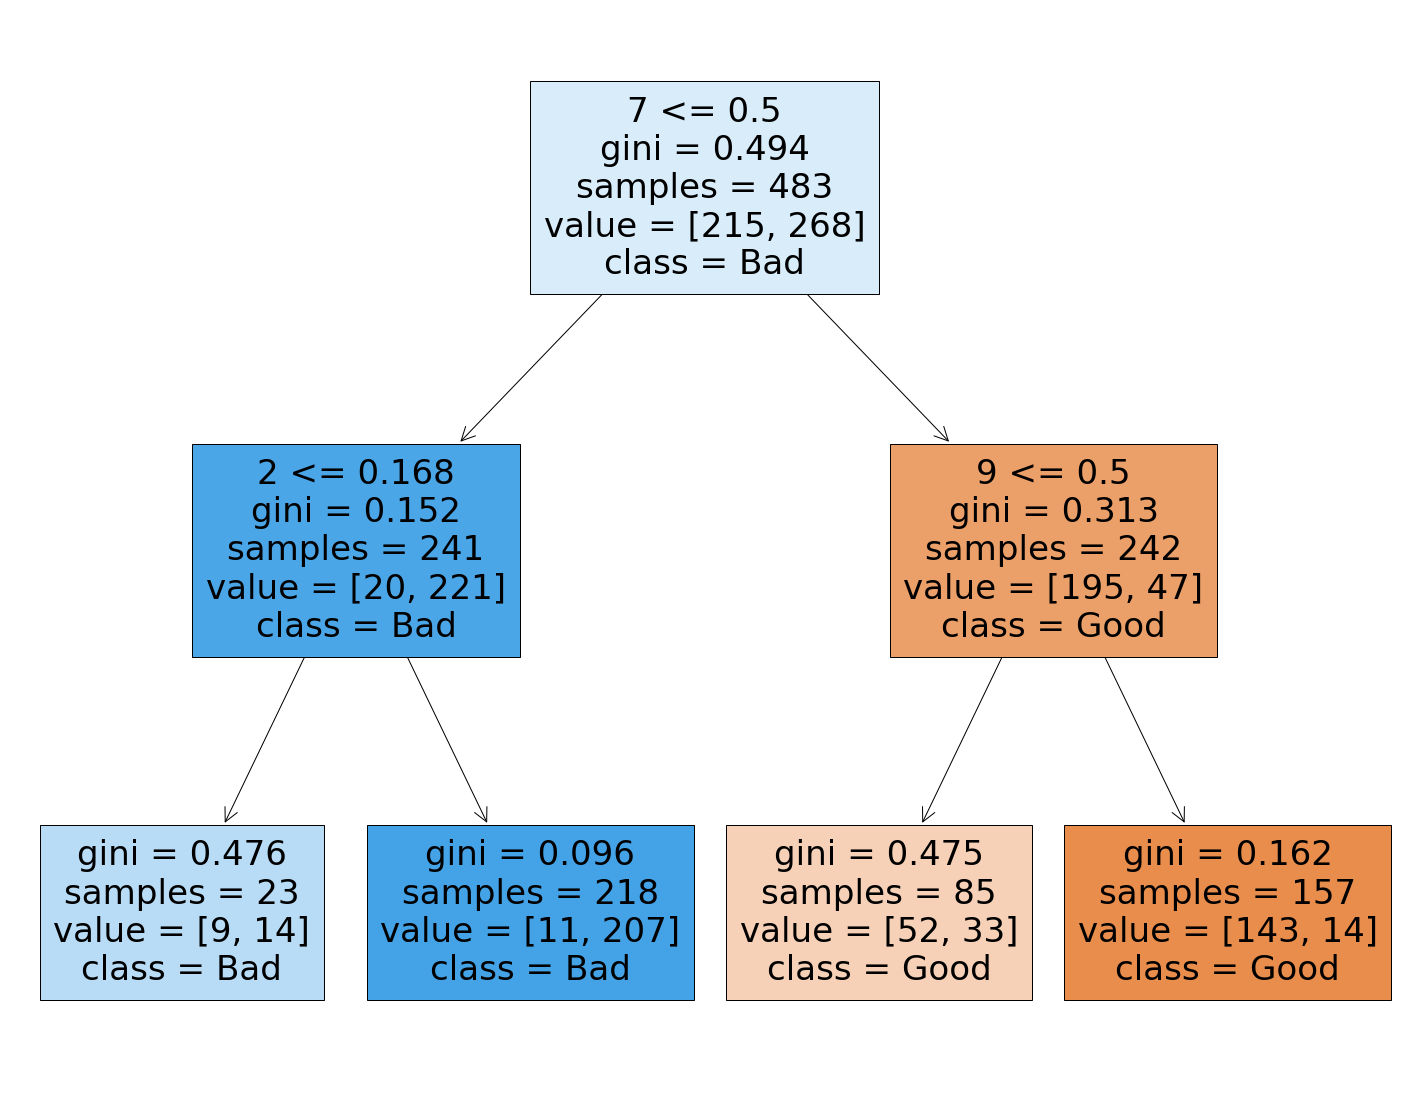

In [6]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(X.columns.values),  
                   class_names=['Good','Bad'],
                   filled=True)

In [7]:
train['Class']=y
y=train[train['7']<=0.5]
y2=train[train['7']>0.5]

one=y[y['2']<=0.168]
one["index"] = range(1, len(one) + 1)
one = one.set_index("index")

two=y[y['2']>=0.168]
two["index"] = range(1, len(two) + 1)
two = two.set_index("index")

three=y2[y2['8']<= 0.5]
three["index"] = range(1, len(three) + 1)
three = three.set_index("index")

four=y2[y2['8']>= 0.5]
four["index"] = range(1, len(four) + 1)
four = four.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/2206815976.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one["index"] = range(1, len(one) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/2206815976.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two["index"] = range(1, len(two) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/2206815976.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [8]:
test- 8,80,48,71

(         0      1      2    3    4    5      6    7    8    9   10   11  \
 index                                                                     
 1     -7.0  14.08  3.460 -6.0 -4.0 -4.0 -6.415 -8.0 -8.0 -8.0 -7.0 -6.0   
 2     -8.0  21.58 -6.250 -7.0 -4.0 -4.0 -6.750 -8.0 -8.0 -8.0 -7.0 -6.0   
 3     -8.0  13.67  3.500 -7.0 -3.0 -5.0 -8.000 -7.0 -7.0  3.0 -7.0 -6.0   
 4     -8.0   7.83 -7.415 -6.0  0.0  0.0 -6.500 -7.0 -7.0 -6.0 -8.0 -6.0   
 5     -7.0   9.42 -1.500 -6.0 -5.0 -4.0 -7.875 -8.0 -8.0 -8.0 -8.0 -6.0   
 ...    ...    ...    ...  ...  ...  ...    ...  ...  ...  ...  ...  ...   
 203   -7.0  15.00 -7.250 -6.0 -1.0 -4.0 -7.500 -7.0 -8.0 -8.0 -7.0 -7.0   
 204   -7.0  27.25  8.500 -7.0  0.0 -4.0 -4.000 -7.0 -8.0 -8.0 -8.0 -6.0   
 205   -8.0  14.92  3.585 -6.0  5.0 -4.0 -7.960 -7.0 -8.0 -8.0 -8.0 -6.0   
 206   -7.0  35.00 -7.710 -7.0  5.0  0.0 -6.250 -7.0 -7.0  0.0 -8.0 -6.0   
 207   -7.0  12.67 -7.585 -6.0  0.0 -4.0 -7.875 -8.0 -8.0 -8.0 -8.0 -6.0   
 
          

In [9]:
train - 23,218,85,157

(          0      1       2     3     4     5       6     7     8     9    10  \
 index                                                                          
 1     -23.0  -0.33 -16.000 -21.0 -15.0 -19.0 -22.835 -23.0 -23.0 -23.0 -23.0   
 2     -22.0  -2.83 -14.830 -21.0 -17.0 -19.0 -21.040 -22.0 -22.0  -9.0 -23.0   
 3     -22.0   4.83 -22.000 -22.0 -21.0 -15.0 -20.000 -23.0 -23.0 -23.0 -23.0   
 4     -23.0  32.75 -15.920 -21.0 -19.0 -15.0 -16.250 -22.0 -22.0 -20.0 -22.0   
 5     -22.0  10.50 -21.250 -21.0  -9.0 -15.0 -18.500 -22.0 -22.0 -19.0 -22.0   
 ...     ...    ...     ...   ...   ...   ...     ...   ...   ...   ...   ...   
 479   -23.0  25.17 -21.665 -21.0 -20.0 -16.0 -22.665 -23.0 -23.0 -23.0 -23.0   
 480   -22.0   8.57 -12.500 -21.0  -9.0 -19.0 -16.500 -22.0 -23.0 -23.0 -23.0   
 481   -23.0  -4.17 -13.460 -21.0 -17.0 -19.0 -22.915 -22.0 -23.0 -23.0 -23.0   
 482   -23.0   4.42  -8.500 -21.0  -9.0 -15.0 -19.915 -22.0 -22.0 -22.0 -23.0   
 483   -22.0  18.00 -22.960 

In [10]:
#test['Class']=z
z=test[test['7']<=0.5]
z2=test[test['7']>0.5]

onetest=z[z['2']<=0.168]
onetest["index"] = range(1, len(onetest) + 1)
onetest = onetest.set_index("index")

twotest=z[z['2']>=0.168]
twotest["index"] = range(1, len(twotest) + 1)
twotest = twotest.set_index("index")

threetest=z2[z2['8']<= 0.5]
threetest["index"] = range(1, len(threetest) + 1)
threetest = threetest.set_index("index")

fourtest=z2[z2['8']>= 0.5]
fourtest["index"] = range(1, len(fourtest) + 1)
fourtest = fourtest.set_index("index")

/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/605530576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onetest["index"] = range(1, len(onetest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/605530576.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twotest["index"] = range(1, len(twotest) + 1)
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/605530576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

# THOMPSON SAMPLING

In [11]:
alpha1,alpha2,alpha3,alpha4=0,0,0,0
beta1,beta2,beta3,beta4=0,0,0,0

betad1=random.betavariate(alpha1+1,beta1+1)
betad2=random.betavariate(alpha2+1,beta2+1)
betad3=random.betavariate(alpha3+1,beta3+1)
betad4=random.betavariate(alpha4+1,beta4+1)

tsreward=[]
reward=0

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(24,86,1):
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad3':betad3,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)
    

    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(86,158,1):
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    dictofbeta={'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)    
    
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(158,219,1):
    chosencustomer=''
    customer2=two.loc[val]
    
    dictofbeta={'betad2':betad2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1      
    
    
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    tsreward.append(reward)    
    
    betad2=random.betavariate(alpha2+1,beta2+1)

In [12]:
profit=0
tsprofit=[]

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad1':betad1,'betad2':betad2,'betad3':betad3,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad1':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta1=beta1+1
        else:
            alpha1=alpha1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1 
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    tsreward.append(reward)
    tsprofit.append(profit)
    
    betad1=random.betavariate(alpha1+1,beta1+1)
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(9,49,1):
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad3':betad3,'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad3':
        chosencustomer=customer3
        if chosencustomer['Class']==1:
            beta3=beta3+1
        else:
            alpha3=alpha3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer2
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    tsreward.append(reward)
    tsprofit.append(profit)
    
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad3=random.betavariate(alpha3+1,beta3+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(49,72,1):
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    dictofbeta={'betad2':betad2,'betad4':betad4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1   

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='betad4':
        chosencustomer=customer4
        if chosencustomer['Class']==1:
            beta4=beta4+1
        else:
            alpha4=alpha4+1       
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    tsreward.append(reward)
    tsprofit.append(profit)   
    
    betad2=random.betavariate(alpha2+1,beta2+1)
    betad4=random.betavariate(alpha4+1,beta4+1)
    
for val in range(72,80,1):
    chosencustomer=''
    customer2=twotest.loc[val]
    
    dictofbeta={'betad2':betad2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='betad2':
        chosencustomer=customer1
        if chosencustomer['Class']==1:
            beta2=beta2+1
        else:
            alpha2=alpha2+1      
    
    
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    tsreward.append(reward)
    tsprofit.append(profit)   
    
    betad2=random.betavariate(alpha2+1,beta2+1)

In [13]:
print(betad1,betad2,betad3,betad4)

0.32084407138617677 0.8484976975162924 0.16852613811080197 0.8825506759809633


In [14]:
ts=pd.DataFrame()
ts['reward']=tsreward
ts['cum_reward']=ts['reward'].cumsum()
ts["index"] = range(1, len(ts) + 1)
ts = ts.set_index("index")
ts['average_reward']=ts['cum_reward']/range(1, len(ts) + 1)

# GREEDY

In [15]:
# actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0

greward=[]
reward=0

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)  
    
for val in range(24,86,1):   
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward= -1
    else:
        reward=1
    
    greward.append(reward)  
    
for val in range(86,156,1):    
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)      

for val in range(158,219,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    greward.append(reward)     

In [16]:
gprofit=[]
profit=0

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    greward.append(reward)  
    gprofit.append(reward)
    
for val in range(9,49,1):   
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    greward.append(reward)  
    gprofit.append(reward)
    
for val in range(49,72,1):    
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    greward.append(reward)  
    gprofit.append(reward)    

for val in range(72,80,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    greward.append(reward)  
    gprofit.append(reward)     

In [17]:
print(actionval1,actionval2,actionval3,actionval4)

-0.3333333333333333 -16.25 -0.14285714285714285 0.8207547169811321


In [18]:
g=pd.DataFrame()
g['reward']=greward
g['cum_reward']=g['reward'].cumsum()

g["index"] = range(1, len(g) + 1)
g = g.set_index("index")

g['average_reward']=g['cum_reward']/range(1, len(g) + 1)

# E-GREEDY

In [19]:
# actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.1

egreward=[]
reward=0

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(24,86,1):   
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward= -1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(86,156,1):    
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)      

for val in range(158,219,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)     

In [20]:
eprofit1=[]
profit=0

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit1.append(reward)
    
for val in range(9,49,1):   
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit1.append(reward)
    
for val in range(49,72,1):    
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit1.append(reward)    

for val in range(72,80,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit1.append(reward)     

In [21]:
print(actionval1,actionval2,actionval3,actionval4)

-1.0 -26.666666666666668 -0.2 0.8316831683168316


In [22]:
eg=pd.DataFrame()
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg["index"] = range(1, len(eg) + 1)
eg = eg.set_index("index")

eg['average_reward-0.1']=eg['cum_reward']/range(1, len(eg) + 1)

In [23]:
# actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0
eps=0.01

egreward=[]
reward=0

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(24,86,1):   
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward= -1
    else:
        reward=1
    
    egreward.append(reward)  
    
for val in range(86,156,1):    
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)      

for val in range(158,219,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    egreward.append(reward)     

In [24]:
eprofit2=[]
profit=0

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        actionval1=0
    else:
        actionval1=sum1/count1
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3    
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(3)
        if customerno == 0:
            chosencustomer=customer1
            count1=count1+1
            if chosencustomer['Class']==1:
                sum1=sum1-1
            else:
                sum1=sum1+1
        elif customerno == 1:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1  
            
        elif customerno == 3:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1          

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit2.append(reward)
    
for val in range(9,49,1):   
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count3==0:
        actionval3=0
    else:
        actionval3=sum3/count3
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2 
    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 1:
            chosencustomer=customer3
            count3=count3+1
            if chosencustomer['Class']==1:
                sum3=sum3-1
            else:
                sum3=sum3+1
        elif customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1              
        elif customerno == 2:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1  

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit2.append(reward)
    
for val in range(49,72,1):    
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    if count4==0:
        actionval4=0
    else:
        actionval4=sum4/count4       
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    p = np.random.random()
    if p < eps:
        customerno = np.random.choice(2)
        if customerno == 0:
            chosencustomer=customer2
            count2=count2+1
            if chosencustomer['Class']==1:
                sum2=sum2-1
            else:
                sum2=sum2+1
            
        elif customerno == 1:
            chosencustomer=customer4
            count4=count4+1
            if chosencustomer['Class']==1:
                sum4=sum4-1
            else:
                sum4=sum4+1  
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1  

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit2.append(reward)    

for val in range(72,80,1):
    chosencustomer=''
    customer2=two.loc[val]

    if count2==0:
        actionval2=0
    else:
        actionval2=sum2/count2

    dictofbeta={'actionval2':actionval2}
    
    p = np.random.random()
    if p < eps:
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
            
    
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count1+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
 
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    egreward.append(reward)  
    eprofit2.append(reward)     

In [25]:
print(actionval1,actionval2,actionval3,actionval4)

-0.3333333333333333 -16.25 -0.14285714285714285 0.8207547169811321


In [26]:
eg['reward']=egreward
eg['cum_reward']=eg['reward'].cumsum()

eg['average_reward-0.01']=eg['cum_reward']/range(1, len(eg) + 1)

# UCB

In [27]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0

ucbreward=[]
reward=0

c=2

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(24,86,1):
    
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval3= average3+deno3
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(86,156,1):
    
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval2= average2+deno2

    actionval4= average4+deno4
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)   

for val in range(158,219,1):
        
    chosencustomer=''
    customer2=two.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))
    
    actionval2= average2+deno2
    
    dictofbeta={'actionval2':actionval2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)   

In [28]:
ucbprofit2=[]
profit=0

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward) 
    ucbprofit2.append(profit)
    
for val in range(9,49,1):
    
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval3= average3+deno3
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward) 
    ucbprofit2.append(profit)   
    
for val in range(49,72,1):
    
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval2= average2+deno2

    actionval4= average4+deno4
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward)  
    ucbprofit2.append(profit)

for val in range(72,80,1):
        
    chosencustomer=''
    customer2=twotest.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))
    
    actionval2= average2+deno2
    
    dictofbeta={'actionval2':actionval2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbprofit2.append(profit)
    ucbreward.append(reward)   

In [29]:
print(actionval1,actionval2,actionval3,actionval4)

0.38397547828043577 -0.5287993188979254 0.9191096825376701 1.1274526328518892


In [30]:
ucb=pd.DataFrame()
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward2']=ucb['cum_reward']/range(1, len(ucb) + 1)

In [31]:
actionval1,actionval2,actionval3,actionval4=0,0,0,0
sum1,sum2,sum3,sum4=0,0,0,0
count1,count2,count3,count4=0,0,0,0

ucbreward=[]
reward=0

c=1

for val in range(1,24,1):
    chosencustomer=''
    customer1=one.loc[val]
    customer2=two.loc[val]
    customer3=three.loc[val]
    customer4=four.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)    
for val in range(24,86,1):
    
    chosencustomer=''
    customer3=three.loc[val]
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval3= average3+deno3
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)     
    
for val in range(86,156,1):
    
    chosencustomer=''
    customer2=two.loc[val]
    customer4=four.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval2= average2+deno2

    actionval4= average4+deno4
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)   

for val in range(158,219,1):
        
    chosencustomer=''
    customer2=two.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))
    
    actionval2= average2+deno2
    
    dictofbeta={'actionval2':actionval2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   

    if chosencustomer['Class']==1:
        reward=-1
    else:
        reward=1
    
    ucbreward.append(reward)   

In [32]:
ucbprofit1=[]
profit=0

for val in range(1,9,1):
    chosencustomer=''
    customer1=onetest.loc[val]
    customer2=twotest.loc[val]
    customer3=threetest.loc[val]
    customer4=fourtest.loc[val]
    
    if count1==0:
        average1=0
        deno1=0
    else:
        average1=sum1/count1
        deno1=c*(math.sqrt(math.log(val)/count1))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3  
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval1= average1+deno1
    actionval2= average2+deno2
    actionval3= average3+deno3
    actionval4= average4+deno4
    
    dictofbeta={'actionval1':actionval1,'actionval2':actionval2,'actionval3':actionval3,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval1':
        chosencustomer=customer1
        count1=count1+1
        if chosencustomer['Class']==1:
            sum1=sum1-1
        else:
            sum1=sum1+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1     
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward) 
    ucbprofit1.append(profit)
    
for val in range(9,49,1):
    
    chosencustomer=''
    customer3=threetest.loc[val]
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count3==0:
        average3=0
        deno3=0
    else:
        average3=sum3/count3
        deno3=c*(math.sqrt(math.log(val)/count3))
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deon2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval3= average3+deno3
    actionval2= average2+deno2
    actionval4= average4+deno4
    
    dictofbeta={'actionval3':actionval3,'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval3':
        chosencustomer=customer3
        count3=count3+1
        if chosencustomer['Class']==1:
            sum3=sum3-1
        else:
            sum3=sum3+1   
    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1

    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1    
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward) 
    ucbprofit1.append(profit)   
    
for val in range(49,72,1):
    
    chosencustomer=''
    customer2=twotest.loc[val]
    customer4=fourtest.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))

    if count4==0:
        average4=0
        deno4=0
    else:
        average4=sum4/count4  
        deno4=c*(math.sqrt(math.log(val)/count4))
    
    actionval2= average2+deno2

    actionval4= average4+deno4
    
    dictofbeta={'actionval2':actionval2,'actionval4':actionval4}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   


    elif max(dictofbeta.keys(), key=dictofbeta.get)=='actionval4':
        chosencustomer=customer4
        count4=count4+1
        if chosencustomer['Class']==1:
            sum4=sum4-1
        else:
            sum4=sum4+1 
            
    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward) 
    ucbprofit1.append(profit)

for val in range(72,80,1):
        
    chosencustomer=''
    customer2=twotest.loc[val]
    
    if count2==0:
        average2=0
        deno2=0
    else:
        average2=sum2/count2
        deno2=c*(math.sqrt(math.log(val)/count2))
    
    actionval2= average2+deno2
    
    dictofbeta={'actionval2':actionval2}
    
    if max(dictofbeta.keys(), key=dictofbeta.get)=='actionval2':
        chosencustomer=customer2
        count2=count2+1
        if chosencustomer['Class']==1:
            sum2=sum2-1
        else:
            sum2=sum2+1   

    if chosencustomer['Class']==1:
        reward=-1
        profit=-1000
    else:
        reward=1
        profit=100
    
    ucbreward.append(reward)
    ucbprofit1.append(profit)

In [33]:
print(actionval1,actionval2,actionval3,actionval4)

0.08329208696630483 -0.7279490047580224 0.6692322606236738 0.9258428483972054


In [34]:
ucb['reward']=ucbreward
ucb['cum_reward']=ucb['reward'].cumsum()

ucb["index"] = range(1, len(ucb) + 1)
ucb = ucb.set_index("index")

ucb['average_reward1']=ucb['cum_reward']/range(1, len(ucb) + 1)

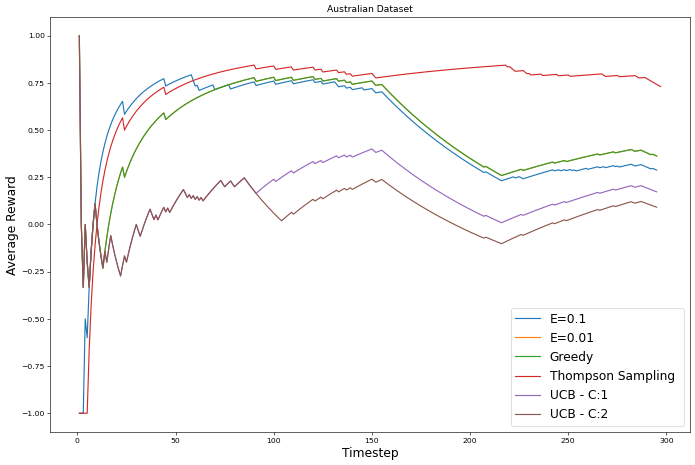

In [35]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(eg['average_reward-0.1'], label="E=0.1")
plt.plot(eg['average_reward-0.01'], label="E=0.01")
plt.plot(g['average_reward'],  label='Greedy')
plt.plot(ts['average_reward'], label='Thompson Sampling ')
plt.plot(ucb['average_reward1'], label='UCB - C:1  ')
plt.plot(ucb['average_reward2'], label='UCB - C:2')

plt.plot(label='Square') 
plt.xlabel('Timestep', fontsize=16)
plt.ylabel('Average Reward', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('Australian Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [36]:
calp=pd.DataFrame(test['Class'])
calp['Amount']=''
calp['Amount'] = np.where(calp['Class'] == 1,-1000, calp['Amount'] )
calp['Amount'] = np.where(calp['Class'] == 0, 100, calp['Amount'] )
calp['cum_profit']=calp['Amount'].cumsum()

In [37]:
test2=test
test2=test.drop('Class',axis=1)

from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(train.iloc[:,0:15], train['Class'])
# Predicting the model
pred_logit= logit.predict(test2)

lr=pd.DataFrame()
lr['lr_class']=pred_logit
lr["index"] = range(1, len(lr) + 1)
lr = lr.set_index("index")
lr['actual_class']=test['Class']
lr['diff']=lr['actual_class']-lr['lr_class']
lr['pp']=100
lr['pp'] = np.where(lr['pp'] == 1,0, lr['pp'])
lr['pp'] = np.where(lr['diff'] == 1,-10*lr['pp'], lr['pp'] )
lr['lr_profit']=lr['pp'].cumsum()

/Users/sarthakgurnani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/1009584630.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lr['pp'].loc[[76]]=-1000
/var/folders/8m/psjkpdq93zg81nb78q_n6r080000gn/T/ipykernel_30552/1009584630.py:21: SettingWithCopyWarning: 
A value is tryin

In [38]:
profits=pd.DataFrame()
profits['TS']=tsprofit
profits['TS']=profits['TS'].cumsum()
profits['G']=gprofit
profits['G']=profits['G'].cumsum()
profits['E1']=eprofit1
profits['E1']=profits['E1'].cumsum()
profits['E2']=eprofit1
profits['E2']=profits['E2'].cumsum()
profits['C2']=ucbprofit2
profits['C2']=profits['C2'].cumsum()
profits['C1']=ucbprofit1
profits['C1']=profits['C1'].cumsum()

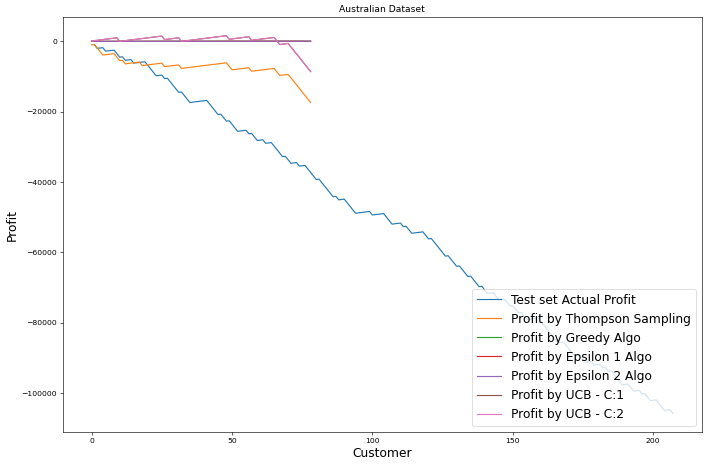

In [39]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['TS'], label="Profit by Thompson Sampling")
plt.plot(profits['G'], label="Profit by Greedy Algo")
plt.plot(profits['E1'], label="Profit by Epsilon 1 Algo")
plt.plot(profits['E2'], label="Profit by Epsilon 2 Algo")
plt.plot(profits['C1'], label="Profit by UCB - C:1")
plt.plot(profits['C2'], label="Profit by UCB - C:2")

plt.plot(label='Square') 
plt.xlabel('Customer', fontsize=16)
plt.ylabel('Profit', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('Australian Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

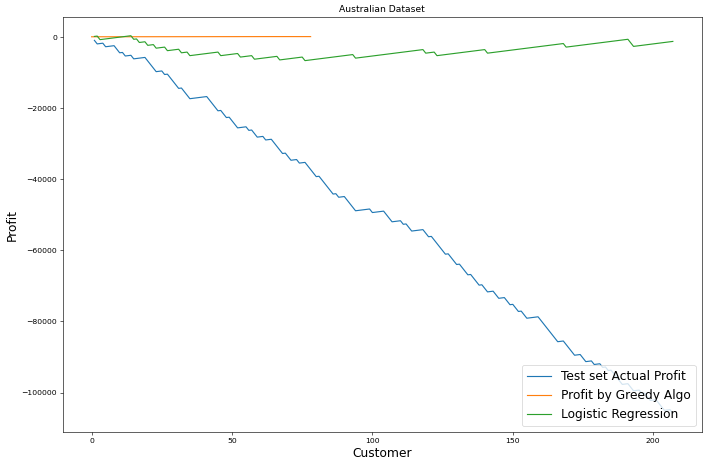

In [40]:
plt.figure(figsize=(15,10), dpi= 55)
plt.plot(calp['cum_profit'], label="Test set Actual Profit")
plt.plot(profits['G'], label="Profit by Greedy Algo")
plt.plot(lr['lr_profit'], label="Logistic Regression")

plt.plot(label='Square') 
plt.xlabel('Customer', fontsize=16)
plt.ylabel('Profit', fontsize=16)
bottom,top = plt.ylim()
left,right = plt.xlim()
plt.title('Australian Dataset')
plt.legend(loc="lower right", fontsize=16)
plt.show()

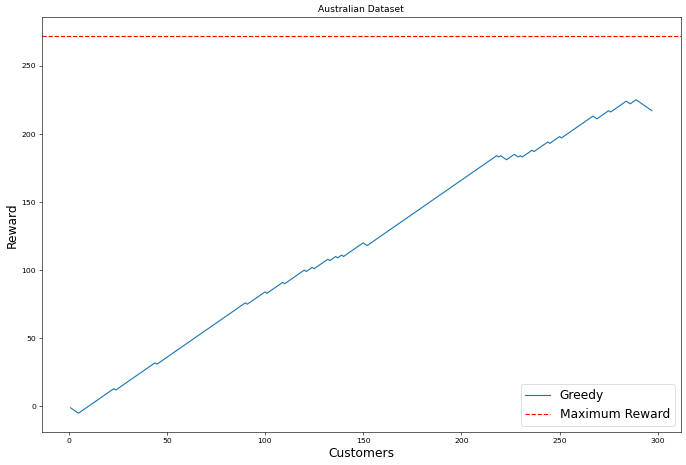

In [41]:
plt.figure(figsize=(15,10), dpi= 55)

plt.plot(ts['cum_reward'], label="Greedy")
plt.axhline(y=272, color='r', linestyle='dashed',label="Maximum Reward")

plt.plot(label='Square') 
plt.xlabel('Customers', fontsize=16)
plt.ylabel('Reward', fontsize=16)
#plt.axis([70000, 100000, 7000000, 9500000])
plt.title('Australian Dataset')


plt.legend(loc="lower right", fontsize=16)
plt.show()